<h1> Check for Equilibrium </h1>

When running a simulation without pulsing nutrients, the system should eventually reach a steady state of equilibrium. Although unrealistic, steady state simulations can allow us to analyse the long-term behavior of marine microbial ecosystems, in terms of how they might evolve and function under constant conditions. For instance, they can help us to generate, test or refine hypotheses regarding competitive interactions between species, predator-prey dynamics, and which species be advantageously adapted under which environmental conditions. 

For our current use-case, we will perform an R* analysis of each included species with respect to their specified resources. Each species included in the model is assigned a maximum growth rate and a substrate affinity according to an automated trade-off, whereby those species that are better adapted to growth, are assigned a lower substrate affinity, and vice versa (e.g. they can be an 'opportunist' or a 'grazer'). When multiple species compete for a given resource, this analysis will allow us to determine which is likely to 'win', under instantaneous conditions.

However, in order for these analyses to reliably performed, we must first test the equilibrium state of the system.

In [8]:
#TODO line up the consumer biomass to be in a subplot right next to the substrate concentration and R*s, 
#     using the same color scheme. (i.e. both the B1 biomass and its R* concentration are the same color).

# given accumulation at surface, LL pool likely not equilibriated, check  - ok if not, as we dunno if recalcitrant DOM really is equilibriated in ocean
# check nutrients, all DOM pools, try checking all biomass at once, and also try pltting over depth

In [ ]:
using NCDatasets
using Plots, ColorSchemes
using DataFrames
using SparseArrays, LinearAlgebra

winter = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Wi100y_230923_17:23_8P6Z13B5D.nc")
summer = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Su100y_230923_19:36_8P6Z13B5D.nc")

In [40]:
function final2(ds, vars)

    final_2yrs = Vector{Any}()

    for v in vars
        append!(final_2yrs, [ds[v][:, :, end-14640:end]])
    end

    return final_2yrs

end

function final2_yr1(ds)

    final2_yr1 = Vector{Any}()

    for i in 1:length(["p", "z", "b", "d"])
        append!(final2_yr1, [ds[i][:, :, 1:7320]])
    end

    return final2_yr1[1], final2_yr1[2], final2_yr1[3], final2_yr1[4]

end

function final2_yr2(ds)

    final2_yr2 = Vector{Any}()

    for j in 1:length(["p", "z", "b", "d"])
        append!(final2_yr2, [ds[j][:, :, end-7320:end]])
    end

    return final2_yr2[1], final2_yr2[2], final2_yr2[3], final2_yr2[4]

end


# function first5(ds, var)

#     out = ds[var][:,:,1:36600]
#     return out

# end

# first5_bw, first5_zw, first5_pw, first5_dw = first5(winter,"b"), first5(winter,"z"), first5(winter,"p"), first5(winter,"d")
# first5_bs, first5_zs, first5_ps, first5_ds = first5(summer,"b"), first5(summer,"z"), first5(summer,"p"), first5(summer,"d")

# final5_bw, final5_zw, final5_pw, final5_dw = final5(winter,"b"), final5(winter,"z"), final5(winter,"p"), final5(winter,"d")
# final5_bs, final5_zs, final5_ps, final5_ds = final5(summer,"b"), final5(summer,"z"), final5(summer,"p"), final5(summer,"d")

final2_yr2 (generic function with 1 method)

In [41]:
final2_w = final2(winter, ["p", "z", "b", "d" ])
final2_s = final2(summer, ["p", "z", "b", "d" ])

4-element Vector{Any}:
 [2.6840822844793736e-305 3.309597349628924e-305 … 0.21790013371482128 0.39197448002910706; 2.683625243712707e-305 3.307313354823647e-305 … 0.21654896939778207 0.38951981735808494; … ; 2.2252992774675799e-305 2.224452257738221e-305 … 1.7839785653185273e-22 4.1369862576891376e-22; 2.2234061881975855e-305 2.2253933628454255e-305 … 1.7616905206472664e-22 4.085301032144231e-22;;; 2.6840822844793736e-305 3.309597349628924e-305 … 0.21790013371482128 0.39197448002910706; 2.683625243712707e-305 3.307313354823647e-305 … 0.21654896939778207 0.38951981735808494; … ; 2.2252992774675799e-305 2.224452257738221e-305 … 1.7839785653185273e-22 4.1369862576891376e-22; 2.2234061881975855e-305 2.2253933628454255e-305 … 1.7616905206472664e-22 4.085301032144231e-22;;; 2.6840822844793736e-305 3.309597349628924e-305 … 0.21790013371482128 0.39197448002910706; 2.683625243712707e-305 3.307313354823647e-305 … 0.21654896939778207 0.38951981735808494; … ; 2.2252992774675799e-305 2.224452257738

In [68]:
pw_yr1, zw_yr1, bw_yr1, dw_yr1 = final2_yr1(final2_w)
pw_yr2, zw_yr2, bw_yr2, dw_yr2 = final2_yr2(final2_w)

([2.5637170280929556e-305 3.0372404083459506e-305 … 0.084674628143363 0.2311188751568396; 2.562677601374667e-305 3.0349742012111725e-305 … 0.08421069299613275 0.2298330323067608; … ; 2.225312954746242e-305 2.223570847971413e-305 … 1.7848314627208713e-21 5.15573226898831e-21; 2.2240956120325237e-305 2.22530929224786e-305 … 1.7625327610281403e-21 5.0913193884026574e-21;;; 2.5637170280929556e-305 3.0372404083459506e-305 … 0.084674628143363 0.2311188751568396; 2.562677601374667e-305 3.0349742012111725e-305 … 0.08421069299613275 0.2298330323067608; … ; 2.225312954746242e-305 2.223570847971413e-305 … 1.7848314627208713e-21 5.15573226898831e-21; 2.2240956120325237e-305 2.22530929224786e-305 … 1.7625327610281403e-21 5.0913193884026574e-21;;; 2.5637170280929556e-305 3.0372404083459506e-305 … 0.084674628143363 0.2311188751568396; 2.562677601374667e-305 3.0349742012111725e-305 … 0.08421069299613275 0.2298330323067608; … ; 2.225312954746242e-305 2.223570847971413e-305 … 1.7848314627208713e-21 5.15

In [141]:
function get_endpoints(vars, ds=NaN)

    endpoints = Vector{Any}()

    if ds != NaN
        for v in vars
            append!(endpoints, [ds["$v"][:,:,end]])
        end
    else
        for v in vars
            append!(endpoints, [v[:,:,end]])
        end
    end

    return endpoints
end


function get_pct_change(yr1, yr2)

    pct_chg = ((yr2[:,:,end] .- yr1[:,:,end])./ yr1[:,:,end]) * 100

    return pct_chg

end

function _extinct(ds)

    # n = get_size(ds)
    dss = copy(ds)
    ex = 10^-6
    for i in 1:8
        dss[:, i] .= ifelse.(dss[:, i] .< ex, 0.0, dss[:, i])
    end

    return dss

end

# function pct_change(C::AbstractVector{<:Number})
#     [i == 1 ? missing : ((C[i]-C[i-1])/C[i-1])*100 for i in eachindex(C)]
# end

_extinct (generic function with 1 method)

In [66]:
function get_size(arr)

    out = Vector{Int}()
    
    for a in arr
        append!(out, size(a, 2))
    end

    return out

end

function get_plot_vars()

    bc = ["cyan3", "darkorange", "indigo", "coral4", "lightcyan4", "magenta2", "thistle", "seagreen4",
    "darkkhaki", "purple", "crimson",  "yellow3", "navajowhite4"]
    dc = ["blue3", "black", "maroon", "coral", "orange3"]
    pc = ["olivedrab3", "darkgreen","red4", "cyan4", "purple", "black", "hotpink2", "wheat2" ]
    nc = ["blue2"]
    ab = 0.8
    ab_ext = 0.8
    ls = 4
    lfs = 9
    lg = :bottomright
    
    return bc, dc, pc, nc, ab, ab_ext, ls, lfs, lg

end

get_plot_vars (generic function with 1 method)

In [124]:
using Plots, Colors, LaTeXStrings

function plot_equilib(yr1, yr2, group)

    H = 890
    dz = 10
    zc = [dz/2:dz:(H-dz/2)]
    n = get_size([yr1])
    bc, dc, pc, nc, ab, ab_ext, ls, lfs, lg = get_plot_vars()
    tfs=9
    al=0.5

    if group == "P"
        cols = pc
    elseif group == "B"
        cols = bc
    elseif group == "Z"
        cols = zc
    elseif group == "D"
        cols = dc
    else
        cols = nc
    end

    pct_chg = get_pct_change(yr1, yr2)

    p1 = plot(yr1[:,1,end], -zc, grid=false, lw=ls, lc=cols[1], title="Penultimate Year", label="", xrotation=45,  
    titlefontsize=tfs, xlabel=L" mm/m^3", alpha=al, ylabel="Depth (m)")
    for i in 2:n[1]
        plot!(yr1[:,i,end], -zc, lw=ls, lc=cols[i], label="", labelfontsize=lfs, alpha=al)
    end

    p2 = plot(yr2[:,1,end], -zc, grid=false, lw=ls, lc=cols[1], title="Final Year", label="", xrotation=45, 
    titlefontsize=tfs, xlabel=L" mm/m^3", alpha=al, yformatter=Returns(""),)
    for i in 2:n[1]
        plot!(yr2[:,i,end], -zc, lw=ls, lc=cols[i], alpha=al, label="")
    end

    p3 = plot(pct_chg[:, 1], -zc, grid=false, lw=ls, lc=cols[1], labelfontsize=lfs, titlefontsize=tfs, xlabel=L" \% ", 
    xlims=(-100, 100), title="% Change", alpha=al, yformatter=Returns(""), label=" $(group)1", legend=lg, xrotation=45, )
    for i in 2:n[1]
        plot!(pct_chg[:, i], -zc, lw=ls, lc=cols[i], label=" $(group)$(i)", labelfontsize=lfs, alpha=al)
    end

    f = plot(p1, p2, p3,
    layout = [1 1 1],
    fg_legend = :transparent,
    size=(600,450),
    plot_title = "Equilibrium State for $(group)",
    )

    return f

end

plot_equilib (generic function with 2 methods)

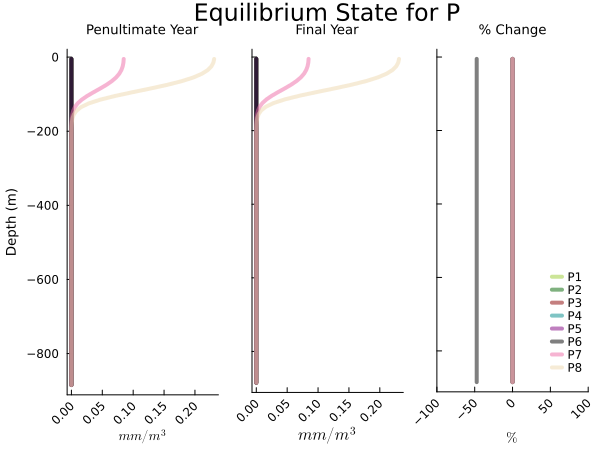

In [125]:
plot_equilib(pw_yr1, pw_yr2, "P")

In [131]:
pw_yr1[:,6,end]

89-element Vector{Float64}:
 3.58430854232833e-30
 3.56502338670183e-30
 3.5163817401965324e-30
 3.425814804290899e-30
 3.279096878390717e-30
 3.0625750845909568e-30
 2.7672834317539274e-30
 2.3947322205602632e-30
 1.9625205639797393e-30
 1.505882449063591e-30
 ⋮
 1.8952693538366037e-49
 1.6476273562408996e-49
 1.4600703023760638e-49
 1.3197530735503555e-49
 1.2169135356113471e-49
 1.144056701444677e-49
 1.0953675916371695e-49
 1.0662857334108043e-49
 1.0531947895472371e-49

In [132]:
pw_yr2[:,6,end]

89-element Vector{Float64}:
 1.8868862810274854e-30
 1.876734003356802e-30
 1.8511275985527624e-30
 1.8034504784452325e-30
 1.72621381249068e-30
 1.6122303209916927e-30
 1.4567800403977737e-30
 1.2606580377632406e-30
 1.033129007918006e-30
 7.927411662312981e-31
 ⋮
 9.977259770954517e-50
 8.673598876945544e-50
 7.686242940177884e-50
 6.947571447653315e-50
 6.406193631004e-50
 6.022653656013781e-50
 5.766339747079067e-50
 5.613244223448535e-50
 5.544329613865789e-50

In [7]:
function plot_pct_change(abs_vals1, pct_chg1, abs_vals2, pct_chg2, ptitle)
    p1 = plot(abs_vals1, lc="blue", label="", lw=3, grid=false, title="first 5 years", titlefontsize=10)
    p2 = plot(pct_chg1, lc="red", label="", lw=3, grid=false)
    p3 = plot(abs_vals2, label=" Abs. value", lc="blue", lw=3, grid=false, title="last 5 years", titlefontsize=10)
    p4 = plot(pct_chg2, label=" % change", lc="red", lw=3, grid=false)
    
    plot(p1, p2, p3, p4, layout = (4, 1), fg_legend = :transparent, plot_title=ptitle, ploytitlefontsize=16)

end

plot_pct_change (generic function with 1 method)

In [ ]:
plot_pct_change(b2_1_strt, b2_chg_1s, b2_1_end, b2_chg_1e, "B2, surface, winter")